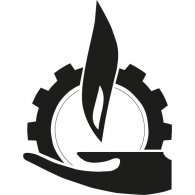

***

<center>
    <b>Module: Graph Theory, Summer 21/22 Assessment.</b>
    <br>
    <b>Student: David Mulhern</b>
    <br>
    <b>ID: G00268549.</b>
    <br>
    <b>Lecturer: Dr. Ian McLoughlin.</b>
</center>

***

## <center>Heapsort.</center>

***


# What is it?

***

<p>In short, heap sort is a commonly used <i>sorting algorithm/technique.</i>
But, in order to understand how this sorting algorithm works, we must first address and clarify what a "heap" is. Let's look at and discuss this.</p>

# Heap.

***

<p>A heap is an ordered tree-based data structure. Most commonly, a heap is implemented using a binary tree. A binary tree is built using nodes. There is 4 types of nodes:</p>
<li>
    Root Node.
</li>
<li>
    Parent Node.
</li>
<li>
    Child Node.
</li>
<li>
    Leaf Node.
</li>
    
<p>All though not all nodes are implicitly one type, one example being that a node can be both a parent and a child node.
The root node is the first 'parent node'. A parent node has a maximum of two children. When a node no longer has any child(ren), then this is then a leaf node.</p>

***

# Binary tree Illustration.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


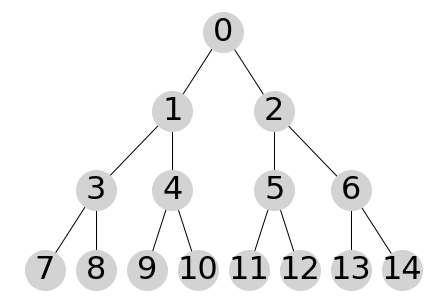

In [8]:
# Importing matplotlib, allowing plotting.
import matplotlib.pyplot as plt
# Importing networkx to illustrate graphs.
import networkx as nx
# Importing to allow mathematical functions.
import math

def drawtree(L, highlight=None):
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
  # Remove nodes beyond the length of L.
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

# Length of a list, in this case, height 4.
n = 15
# Create a list of length n.
L = list(range(n))
# Show the list.
print(L)
# Draw the tree from L.
drawtree(L)

# Heap Types.

***

<p>Parents and children must maintain some order of values, this will define the type of heap, thus heaps can be constructed in two ways:
<ol>
    <li>
        Max Heap.
    </li>
    <li>
       Min Heap.
    </li>
</ol>

<b>Max Heap:</b> The value of the parent is always more than the value of the children. This will ensure that the root node will be the maximum value in the entire heap.</p>
<p>
    <b>Min Heap:</b> The value of the parent is always less than the value of the children. This will ensure that the root node will be the minimum value in the entire heap.</p>
</p>

# How does heap sort work?

***

<p>
    Now that we have covered what exactly a heap is, let's discuss how the heap sort algoritm works and later look at some code implementations and put this methodology to practice.
</p>

[Heap sort wikipedia.](https://en.wikipedia.org/wiki/Heapsort)

<p>
    As defined by wikipedia, heap sort is a comparison-based sorting algorithm. Meaning, we take an array of random integers and we want to sort them into order. We visualise this using a binary tree we construct from an array or list.
    Take for example the array: [6, 9, 11, 2, 5, 13, 3]. How can we confirm the order of parent and children?<br><br>
    The index of any element can be 'i' so take for this example <b>9</b> being <b>i</b>. The rules is as follows:<br><br>
    The index (2*i)+1 will return the index of the left child<br> 
    <b> (2*1) + 1 = 3, hency left child is at index 3 - Which is the 2, correct! </b><br>
    The index (2*i)+2 will return the index of the right child<br> 
    <b> (2*1) + 2 = 4, hency left child is at index 4 - Which is the 5, correct!</b>
</p>

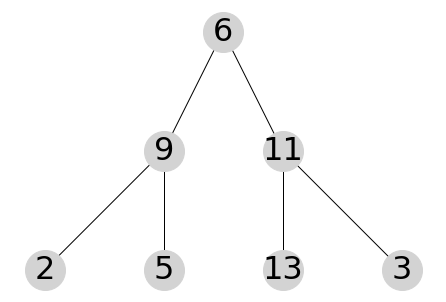

In [11]:
# Given array.
L= [6, 9, 11, 2, 5, 13, 3]
drawtree(L)

<p>In our upcoming code, there are two major operators/functions at work here:</p>
<ol>
    <li>
        heapify.
    </li>
    <li>
        heapSort.
    </li>
</ol>

***

#### Heapify function.

***

<p>
    The objective here is to first create a max heap of the tree. Meaning we want to order the heap, having the largest values starting from the topmost node and have the next in line (left to right) values descend down to the leaf nodes. We achieve this by running this function on all of the <i>none-leaf</i> elements in the heap and swapping them with their children where necessary. Recursion comes into play here and we continue swapping, thereby pushing lower values out the the leafs, also known as "sifting down".<br>
    Once this process is complete, we are left with a <b>Max Heap.</b>
</p>

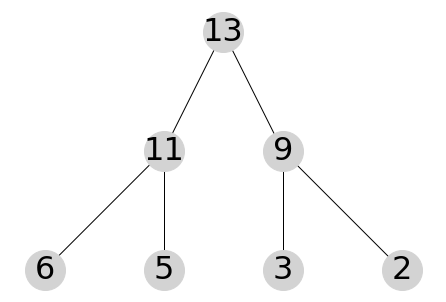

In [12]:
L= [13, 11, 9, 6, 5, 3, 2]
drawtree(L)

***

#### Heap Sort function.

***

<p>This function will get passed an unsorted array. It first will pass the array to the previously made heapify function, thus returning a max heap.<br>
Now, more recursion takes place. Once we have the first max heap, this function will swap the largest value (root node) with the last item in the heap. It will then remove the last item(now the largest) and store it seperately in another array. Next, you've guessed it! We run another heapify on the now shorter array and continue this process, adding every removed element to the new array (pushing the largest value to the back on every addition). See figure below as an illustrations on the first swap</p>


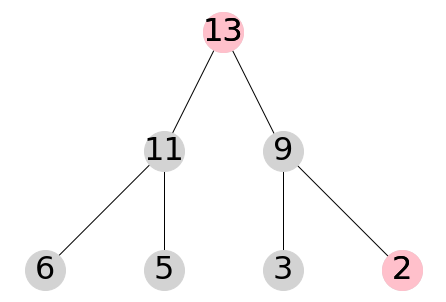

In [16]:
L= [13, 11, 9, 6, 5, 3, 2]
drawtree(L, [13, 2])

## Swapping nodes

***

<p>heapSort function has recieved this Max Heap array: [13, 11, 9, 6, 5, 3, 2]

It will now swap the largest value at the root for the last value in the heap and thereafter remove the last element and store it into a new array.<p>

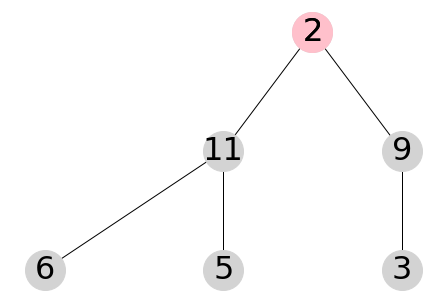

In [17]:
L= [2, 11, 9, 6, 5, 3]
drawtree(L, [2])

## Remove a node and add to a new array.

***

Two arrays:
<ol>
    <li>
        L = [2, 11, 9, 6, 5, 3]
    </li>
    <li>
       newArray = [13]
    </li>
</ol>

<p>This process will iterate enough times to cover each element in the heap. Once the array (L) is depleted and all values have been added to the new array (newArray) our sorting algorithm is complete. This is how heapsort works.<br><br>
    
All iterations complete:
    <ol>
    <li>
        L = []
    </li>
    <li>
       newArray = [2, 3, 5, 6, 9, 11, 13]
    </li>
</ol>
</p>